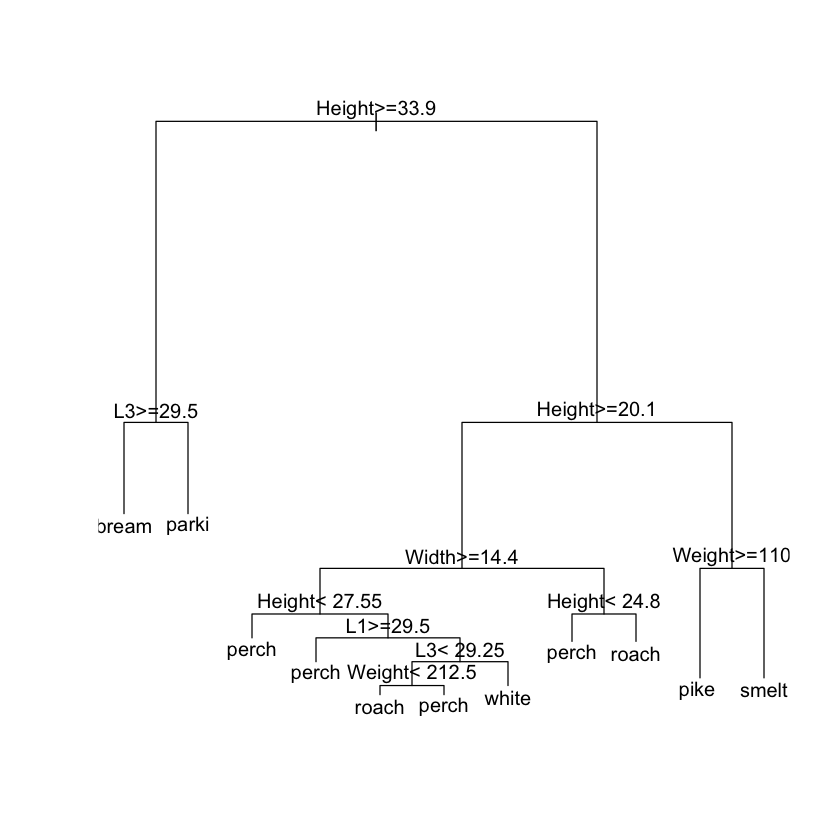

In [2]:
fish = read.table("/Users/c/Downloads/fish.dat", header = T)
library(rpart)
fish_control = rpart.control(minisplit = 10, minbucket = 3, xval = 0)
fish_treeorig = rpart(Species ~ Weight + L1 + L2 + L3 + Height + Width, data = fish, method = "class", control = fish_control)
plot(fish_treeorig)
text(fish_treeorig)

In [3]:
printcp(fish_treeorig)


Classification tree:
rpart(formula = Species ~ Weight + L1 + L2 + L3 + Height + Width, 
    data = fish, method = "class", control = fish_control)

Variables actually used in tree construction:
[1] Height L1     L3     Weight Width 

Root node error: 94/148 = 0.63514

n= 148 

        CP nsplit rel error
1 0.351064      0   1.00000
2 0.170213      1   0.64894
3 0.127660      2   0.47872
4 0.106383      3   0.35106
5 0.053191      4   0.24468
6 0.031915      5   0.19149
7 0.010638      6   0.15957
8 0.010000     10   0.11702


In [4]:
summary(fish_treeorig)

Call:
rpart(formula = Species ~ Weight + L1 + L2 + L3 + Height + Width, 
    data = fish, method = "class", control = fish_control)
  n= 148 

          CP nsplit rel error
1 0.35106383      0 1.0000000
2 0.17021277      1 0.6489362
3 0.12765957      2 0.4787234
4 0.10638298      3 0.3510638
5 0.05319149      4 0.2446809
6 0.03191489      5 0.1914894
7 0.01063830      6 0.1595745
8 0.01000000     10 0.1170213

Variable importance
Height     L3     L2     L1 Weight  Width 
    26     16     15     15     15     13 

Node number 1: 148 observations,    complexity param=0.3510638
  predicted class=perch  expected loss=0.6351351  P(node) =1
    class counts:    33    10    54    16    18    12     5
   probabilities: 0.223 0.068 0.365 0.108 0.122 0.081 0.034 
  left son=2 (43 obs) right son=3 (105 obs)
  Primary splits:
      Height < 33.9   to the right, improve=29.75863, (0 missing)
      Width  < 11.85  to the right, improve=17.98385, (0 missing)
      L3     < 29.7   to the right, impr

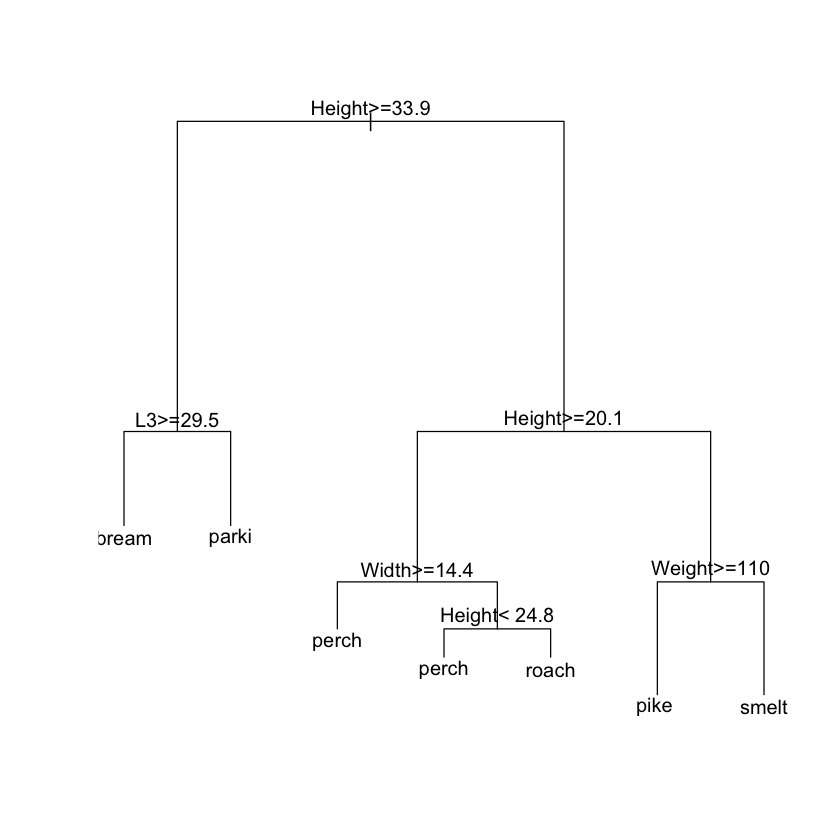

In [6]:
fish_prunetree = prune.rpart(fish_treeorig, cp = 0.02) 
plot(fish_prunetree)
text(fish_prunetree)

In [7]:
L21 = fish$L2 - fish$L1
L32 = fish$L3 - fish$L2
L31 = fish$L3 - fish$L1
newfish = cbind(fish, L21, L32, L31)
newfish_treenew = rpart(Species ~ ., data = newfish, method = "class", parms = list(split = 'information'), control = fish_control)
printcp(newfish_treenew)


Classification tree:
rpart(formula = Species ~ ., data = newfish, method = "class", 
    parms = list(split = "information"), control = fish_control)

Variables actually used in tree construction:
[1] Height L21    L3     L32    Weight

Root node error: 94/148 = 0.63514

n= 148 

        CP nsplit rel error
1 0.351064      0  1.000000
2 0.170213      1  0.648936
3 0.127660      2  0.478723
4 0.106383      3  0.351064
5 0.095745      4  0.244681
6 0.053191      5  0.148936
7 0.047872      6  0.095745
8 0.010000      8  0.000000


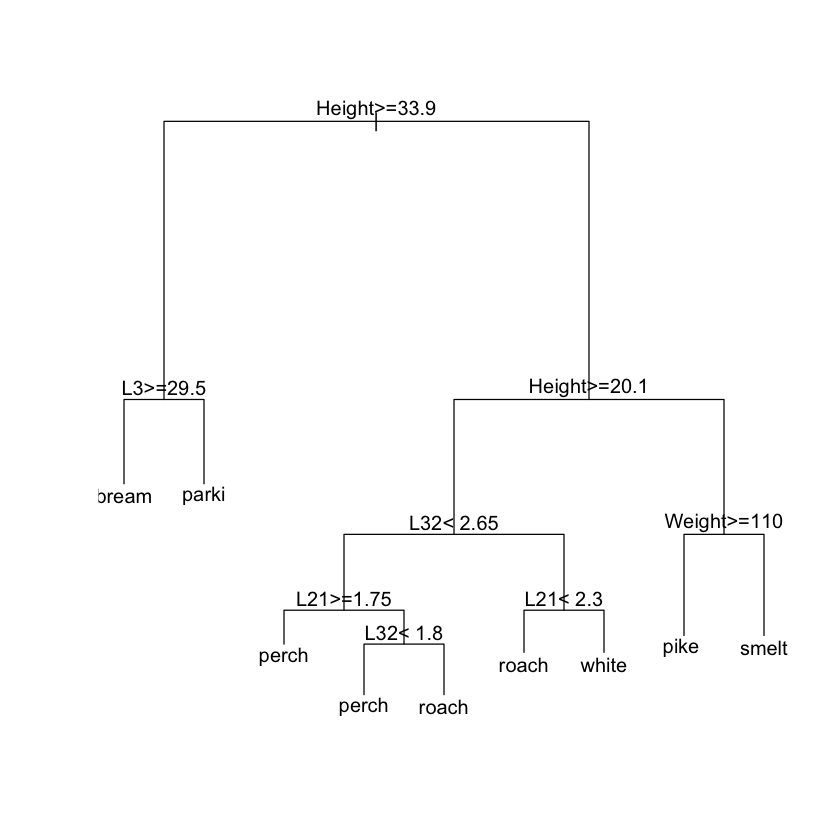

In [8]:
plot(newfish_treenew)
text(newfish_treenew)

In [12]:
fish_control = rpart.control(minbucket = 3, minsplit = 10, xval = 10)
newfish_treenewcv = rpart(Species ~ ., data = newfish, method = "class",
parms = list(split = 'information'), control = fish_control)
printcp(newfish_treenewcv)


Classification tree:
rpart(formula = Species ~ ., data = newfish, method = "class", 
    parms = list(split = "information"), control = fish_control)

Variables actually used in tree construction:
[1] Height L21    L3     L32    Weight

Root node error: 94/148 = 0.63514

n= 148 

        CP nsplit rel error   xerror     xstd
1 0.351064      0  1.000000 1.000000 0.062302
2 0.170213      1  0.648936 0.648936 0.063704
3 0.127660      2  0.478723 0.478723 0.059534
4 0.106383      3  0.351064 0.382979 0.055527
5 0.095745      4  0.244681 0.329787 0.052664
6 0.053191      5  0.148936 0.223404 0.045160
7 0.047872      6  0.095745 0.223404 0.045160
8 0.010000      8  0.000000 0.074468 0.027473


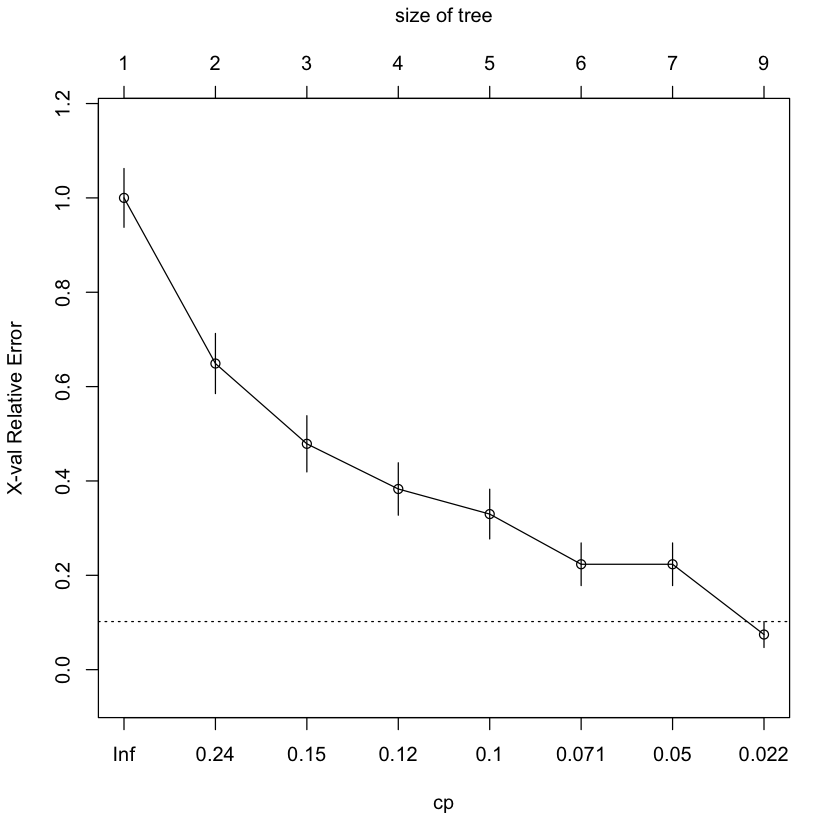

In [13]:
plotcp(newfish_treenewcv)

In [15]:
newfish_test = read.table("/Users/c/Downloads/fish_test.dat", h = T)
L31 = newfish_test$L3- newfish_test$L1
L32 = newfish_test$L3- newfish_test$L2
L21 = newfish_test$L2- newfish_test$L1
newfish_test = cbind(newfish_test, L21, L32, L31)
newfish_tpred = predict(newfish_treenewcv, newfish_test) 
print(newfish_tpred)

   bream parki perch pike roach smelt white
1      1     0     0    0     0     0     0
2      1     0     0    0     0     0     0
3      0     0     1    0     0     0     0
4      0     0     1    0     0     0     0
5      0     0     0    1     0     0     0
6      0     0     0    0     0     1     0
7      0     0     0    0     0     1     0
8      0     1     0    0     0     0     0
9      0     0     0    0     1     0     0
10     0     0     0    0     1     0     0
11     0     0     0    0     0     0     1


In [17]:
library(MASS)

In [18]:
newfish_lda = lda(Species ~ ., data = newfish)

Warning message in lda.default(x, grouping, ...):
“variables are collinear”


In [19]:
newfish_lda = lda(Species ~ Weight + L1 + Height + Width + L21 + L32, data = newfish)
print(newfish_lda)

Call:
lda(Species ~ Weight + L1 + Height + Width + L21 + L32, data = newfish)

Prior probabilities of groups:
     bream      parki      perch       pike      roach      smelt      white 
0.22297297 0.06756757 0.36486486 0.10810811 0.12162162 0.08108108 0.03378378 

Group means:
        Weight       L1   Height    Width       L21      L32
bream 636.1818 30.60606 39.52727 14.10000 2.8060606 5.272727
parki 155.8000 18.62000 39.20000 14.18000 1.6100000 2.430000
perch 360.9333 25.31852 26.17778 15.78519 2.1259259 1.650000
pike  742.0625 42.88125 15.85625 10.48125 3.0375000 3.281250
roach 159.1111 20.66667 26.88333 14.57222 1.6388889 2.716667
smelt  11.5000 11.34167 16.99167 10.21667 0.6916667 1.091667
white 477.2000 27.82000 29.10000 15.76000 2.4800000 2.960000

Coefficients of linear discriminants:
                LD1          LD2          LD3          LD4          LD5
Weight  0.000911022 -0.002710071  0.007553399  0.001688806  0.006182751
L1      0.132200166  0.036926540 -0.259794107 -0.

In [20]:
newfish_ldapred = predict(newfish_lda, newfish[, -1])
table(newfish$Species, newfish_ldapred$class)

       
        bream parki perch pike roach smelt white
  bream    33     0     0    0     0     0     0
  parki     0    10     0    0     0     0     0
  perch     0     0    54    0     0     0     0
  pike      0     0     0   16     0     0     0
  roach     0     0     0    0    18     0     0
  smelt     0     0     0    0     0    12     0
  white     0     0     0    0     1     0     4

In [21]:
library(caret)

Loading required package: lattice

Loading required package: ggplot2



In [23]:
trControl = trainControl(method = "cv", number = 10)
fit_lda = train(Species ~ Weight + L1 + Height + Width + L21 + L32, method = "lda", trControl = trControl, metric = "Accuracy", data = newfish)
print(fit_lda)

Linear Discriminant Analysis 

148 samples
  6 predictor
  7 classes: 'bream', 'parki', 'perch', 'pike', 'roach', 'smelt', 'white' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 135, 133, 132, 132, 133, 133, ... 
Resampling results:

  Accuracy   Kappa    
  0.9928571  0.9909091



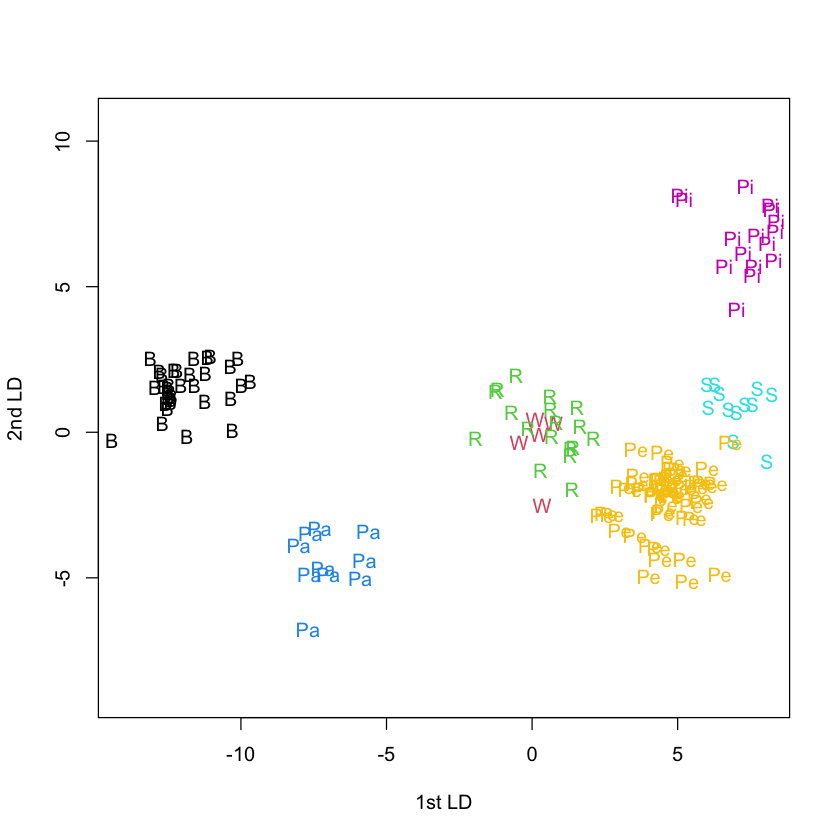

In [25]:
eqscplot(newfish_ldapred$x, type = "n", xlab = "1st LD", ylab = "2nd LD")
fish_species = c(rep("B", 33), rep("W", 5), rep("R", 18), rep("Pa", 10), rep("S", 12), rep("Pi", 16), rep("Pe", 54))
fish_colors = c(rep(1, 33), rep(2, 5), rep(3, 18), rep(4, 10), rep(5, 12), rep(6, 16), rep(7, 54))
text(newfish_ldapred$x[, 1:2], fish_species, col = fish_colors)

In [27]:
newfish_ldatest = predict(newfish_lda, newfish_test)
print(newfish_ldatest$class)

 [1] bream bream perch perch pike  smelt smelt parki roach roach white
Levels: bream parki perch pike roach smelt white


In [28]:
newfish_qda = qda(Species ~ ., data = newfish)

ERROR: Error in qda.default(x, grouping, ...): some group is too small for 'qda'


In [29]:
newfish_q = read.table("/Users/c/Downloads/newfish.qdat", h = T)
newfish_qda = qda(Species~ ., data = newfish_q)

ERROR: Error in qda.default(x, grouping, ...): rank deficiency in group bream


In [30]:
newfish_qda = qda(Species ~ Weight + L1 + Height + Width + L21 + L32, data = newfish_q)
newfish_qdapred = predict(newfish_qda, newfish_q)
table(newfish_q$Species, newfish_qdapred$class)

       
        bream parki perch pike roach smelt
  bream    33     0     0    0     0     0
  parki     0    10     0    0     0     0
  perch     0     0    54    0     0     0
  pike      0     0     0   16     0     0
  roach     0     0     0    0    18     0
  smelt     0     0     0    0     0    12

In [32]:
print(predict(newfish_qda, newfish_test)$class)

 [1] bream bream perch perch pike  smelt smelt parki roach roach perch
Levels: bream parki perch pike roach smelt


In [33]:
trControl = trainControl(method = "cv", number = 10)
fit_qda = train(Species ~ Weight + L1 + Height + Width + L21 + L32, method = "qda", trControl = trControl, metric = "Accuracy", data = newfish_q)
print(fit_qda)

Quadratic Discriminant Analysis 

143 samples
  6 predictor
  6 classes: 'bream', 'parki', 'perch', 'pike', 'roach', 'smelt' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 129, 128, 128, 129, 130, 129, ... 
Resampling results:

  Accuracy  Kappa    
  0.972381  0.9630902



In [34]:
newfish1 = newfish[, c(1, 2, 3, 6, 8, 9)]

In [35]:
trControl = trainControl(method = 'cv', number = 10)
fit = train(Species ~ ., method = "knn", tuneGrid = expand.grid(k = 1:10),
            trControl = trControl, metric = "Accuracy", data = newfish1)
print(fit)

k-Nearest Neighbors 

148 samples
  5 predictor
  7 classes: 'bream', 'parki', 'perch', 'pike', 'roach', 'smelt', 'white' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 132, 132, 134, 134, 134, 132, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   1  0.6467262  0.5363920
   2  0.5802976  0.4453572
   3  0.6124405  0.4827723
   4  0.5714286  0.4253909
   5  0.5539286  0.3997943
   6  0.5316071  0.3592120
   7  0.4861310  0.3019941
   8  0.4852381  0.2961497
   9  0.4704167  0.2891889
  10  0.4775595  0.2983172

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 1.


In [37]:
library(class)
newfish1_test = newfish_test[, c(1, 2, 5, 7, 8)]
newfish_knntest = knn(newfish1[, 2:6], newfish1_test, newfish1[, "Species"], k = 1, prob = T)
print(newfish_knntest)

 [1] bream bream perch white perch smelt smelt parki perch perch perch
attr(,"prob")
 [1] 1 1 1 1 1 1 1 1 1 1 1
Levels: bream parki perch pike roach smelt white


In [38]:
library(nnet)

In [40]:
newfish_logd = multinom(Species ~ ., data = newfish, maxit = 250)
print(newfish_logd)

# weights:  77 (60 variable)
initial  value 287.994702 
iter  10 value 189.100680
iter  20 value 82.739762
iter  30 value 15.668415
iter  40 value 0.165377
iter  50 value 0.003851
final  value 0.000000 
converged
Call:
multinom(formula = Species ~ ., data = newfish, maxit = 250)

Coefficients:
      (Intercept)      Weight         L1          L2         L3     Height
parki   -29.45533  0.02917110   6.349592  17.8259067 -23.500970   9.645257
perch   -80.11405  0.16021628   3.267803  56.6489219 -53.765483   6.684178
pike     15.22567 -0.05874368   8.093673   0.9753102  -3.095179 -13.084687
roach  -277.16410 -0.51539078  54.195310 -43.6844449   4.362472  -2.952463
smelt   455.64639  0.18459382  29.363751 -20.5072505 -10.290211 -13.228223
white   -57.01255  0.19991067 -17.467222  31.7667561 -20.454096  -4.118171
          Width        L21         L32        L31
parki  3.247584  11.476314  -41.326877 -29.850563
perch 21.052273  53.381119 -110.414404 -57.033286
pike  21.652958  -7.118363   -

In [41]:
table(newfish$Species , predict(newfish_logd, newfish))

       
        bream parki perch pike roach smelt white
  bream    33     0     0    0     0     0     0
  parki     0    10     0    0     0     0     0
  perch     0     0    54    0     0     0     0
  pike      0     0     0   16     0     0     0
  roach     0     0     0    0    18     0     0
  smelt     0     0     0    0     0    12     0
  white     0     0     0    0     0     0     5

In [43]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-1



In [44]:
x = as.matrix(newfish[, -1])
y = newfish$Species
cvfit = cv.glmnet(x, y, family = 'multinomial', type.measure = 'class', nfolds = 10)

Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dang

In [46]:
predict.value = predict(cvfit, x, s = "lambda.min", type = "class")
table(predict.value, newfish$Species)

             
predict.value bream parki perch pike roach smelt white
        bream    33     0     0    0     0     0     0
        parki     0    10     0    0     0     0     0
        perch     0     0    54    0     0     0     0
        pike      0     0     0   16     0     0     0
        roach     0     0     0    0    18     0     0
        smelt     0     0     0    0     0    12     0
        white     0     0     0    0     0     0     5

In [48]:
print(predict(newfish_logd, newfish_test))

 [1] bream bream perch perch pike  smelt smelt parki roach roach white
Levels: bream parki perch pike roach smelt white
